<a href="https://colab.research.google.com/github/ydicsey/ipynb_code/blob/main/DVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json

data = 0

# after loading the transfer function, 
# each subarray (control point) in an opacity function: [dataValue, opacity]
# each subarray (control point) in a color function: [dataValue, R(0-1), G(0-1), B(0-1)]
opacityTransferFunc = []
colorTransferFunc = []

##### data loading and setup/plot image
##### DO NOT modify this function
def Initialize(tfFileName):
    global data
    plt.rcParams['figure.figsize'] = [5, 5]
    plt.axis('off')
    data = np.load('data.npy')
    
    f = open(tfFileName)
    jsn = json.load(f)
    jsn = jsn[0]

    opacityTransferFunc.clear()
    colorTransferFunc.clear()
    for i in range( 0, len(jsn['Points']), 4 ):
        tmp = []
        tmp.append(jsn['Points'][i+0])
        tmp.append(jsn['Points'][i+1])
        opacityTransferFunc.append(tmp)
    for i in range( 0, len(jsn['RGBPoints']), 4 ):
        tmp = []
        tmp.append(jsn['RGBPoints'][i+0])
        tmp.append(jsn['RGBPoints'][i+1])
        tmp.append(jsn['RGBPoints'][i+2])
        tmp.append(jsn['RGBPoints'][i+3])
        colorTransferFunc.append(tmp)

###### get data value: x and y are locaion on the image plane, z is coordinate along the pixel depth direction
###### In this data, x index: [0, 125), y index: [0, 125), z index: [0, 49)
def getValue( x, y, z ):
    global data
    return data[ z, x, y ] 

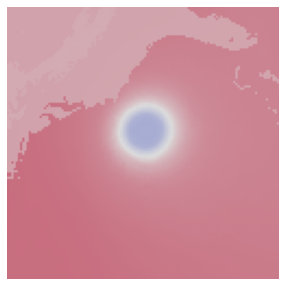

In [ ]:
########### main 

### initialize and load a transfer function, the input argument is the trasnfer function file name
### after loading the opacity function and color function are stored in 'opacityTransferFunc' and 'colorTransferFunc'
Initialize('TF1.json')

##### 'img' is used to store the final image
img = np.zeros([125, 125, 3])

####### implment you direct volume rendering here and store the final image in "img"
# print("TODO: you shoud implment direct volume rendering here")

Alpha_xp = []
Alpha_fp = []
C_xp = []
R_fp = []
G_fp = []
B_fp = []

for i in range(len(opacityTransferFunc)):
    Alpha_xp.append(opacityTransferFunc[i][0])
    Alpha_fp.append(opacityTransferFunc[i][1])
for i in range(len(colorTransferFunc)):
    C_xp.append(colorTransferFunc[i][0])
    R_fp.append(colorTransferFunc[i][1])
    G_fp.append(colorTransferFunc[i][2])
    B_fp.append(colorTransferFunc[i][3])

for i in range(125):
    for j in range(125):
        pre_Alpha = 0
        pre_R = 0
        pre_G = 0
        pre_B = 0
        for k in range(49):
            C_R = pre_R + np.interp(getValue(i,j,k), C_xp, R_fp) * np.interp(getValue(i,j,k), Alpha_xp, Alpha_fp) * (1-pre_Alpha)
            C_G = pre_G + np.interp(getValue(i,j,k), C_xp, G_fp) * np.interp(getValue(i,j,k), Alpha_xp, Alpha_fp) * (1-pre_Alpha)
            C_B = pre_B + np.interp(getValue(i,j,k), C_xp, B_fp) * np.interp(getValue(i,j,k), Alpha_xp, Alpha_fp) * (1-pre_Alpha)
            pre_R = C_R
            pre_G = C_G
            pre_B = C_B
            Alpha = pre_Alpha + np.interp(getValue(i,j,k), Alpha_xp, Alpha_fp) * (1-pre_Alpha)
            pre_Alpha = Alpha
            
        img[i,j] = [C_R, C_G, C_B]
####### show final image (img)
plt.imshow(img)
plt.show()

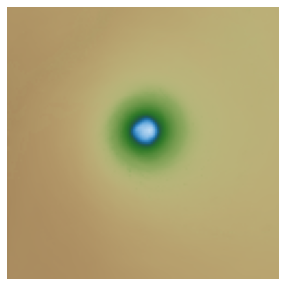

In [ ]:
########### main 

### initialize and load a transfer function, the input argument is the trasnfer function file name
### after loading the opacity function and color function are stored in 'opacityTransferFunc' and 'colorTransferFunc'
Initialize('TF2.json')

##### 'img' is used to store the final image
img = np.zeros([125, 125, 3])

####### implment you direct volume rendering here and store the final image in "img"
# print("TODO: you shoud implment direct volume rendering here")

Alpha_xp = []
Alpha_fp = []
C_xp = []
R_fp = []
G_fp = []
B_fp = []

for i in range(len(opacityTransferFunc)):
    Alpha_xp.append(opacityTransferFunc[i][0])
    Alpha_fp.append(opacityTransferFunc[i][1])
for i in range(len(colorTransferFunc)):
    C_xp.append(colorTransferFunc[i][0])
    R_fp.append(colorTransferFunc[i][1])
    G_fp.append(colorTransferFunc[i][2])
    B_fp.append(colorTransferFunc[i][3])

for i in range(125):
    for j in range(125):
        pre_Alpha = 0
        pre_R = 0
        pre_G = 0
        pre_B = 0
        for k in range(49):
            C_R = pre_R + np.interp(getValue(i,j,k), C_xp, R_fp) * np.interp(getValue(i,j,k), Alpha_xp, Alpha_fp) * (1-pre_Alpha)
            C_G = pre_G + np.interp(getValue(i,j,k), C_xp, G_fp) * np.interp(getValue(i,j,k), Alpha_xp, Alpha_fp) * (1-pre_Alpha)
            C_B = pre_B + np.interp(getValue(i,j,k), C_xp, B_fp) * np.interp(getValue(i,j,k), Alpha_xp, Alpha_fp) * (1-pre_Alpha)
            pre_R = C_R
            pre_G = C_G
            pre_B = C_B
            Alpha = pre_Alpha + np.interp(getValue(i,j,k), Alpha_xp, Alpha_fp) * (1-pre_Alpha)
            pre_Alpha = Alpha
            
        img[i,j] = [C_R, C_G, C_B]
####### show final image (img)
plt.imshow(img)
plt.show()